In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
cpu_df = pd.read_csv('data/m16_cpu_usage.csv', delimiter=';')
cpu_df.head()

,time,machine_id,cpu_util
0,2017-11-05T02:00:00.000000Z,m16,30.660000
1,2017-11-05T02:01:00.000000Z,m16,29.780000
2,2017-11-05T02:02:00.000000Z,m16,26.170000
3,2017-11-05T02:03:00.000000Z,m16,26.266667
4,2017-11-05T02:04:00.000000Z,m16,26.655000


In [28]:
#remove nan values
cpu_df = cpu_df.dropna()

In [29]:
cpu_df

,time,machine_id,cpu_util
0,2017-11-05T02:00:00.000000Z,m16,30.660000
1,2017-11-05T02:01:00.000000Z,m16,29.780000
2,2017-11-05T02:02:00.000000Z,m16,26.170000
3,2017-11-05T02:03:00.000000Z,m16,26.266667
4,2017-11-05T02:04:00.000000Z,m16,26.655000
...,...,...,...
58598,2017-12-15T18:38:00.000000Z,m16,17.300000
58599,2017-12-15T18:39:00.000000Z,m16,17.026667
58600,2017-12-15T18:40:00.000000Z,m16,17.853333
58601,2017-12-15T18:41:00.000000Z,m16,17.393333


In [30]:
#convert to datetime
cpu_df['time'] = pd.to_datetime(cpu_df['time'])

In [31]:
cpu_df

,time,machine_id,cpu_util
0,2017-11-05 02:00:00+00:00,m16,30.660000
1,2017-11-05 02:01:00+00:00,m16,29.780000
2,2017-11-05 02:02:00+00:00,m16,26.170000
3,2017-11-05 02:03:00+00:00,m16,26.266667
4,2017-11-05 02:04:00+00:00,m16,26.655000
...,...,...,...
58598,2017-12-15 18:38:00+00:00,m16,17.300000
58599,2017-12-15 18:39:00+00:00,m16,17.026667
58600,2017-12-15 18:40:00+00:00,m16,17.853333
58601,2017-12-15 18:41:00+00:00,m16,17.393333


In [32]:
#convert cpu_util in range of 0-1
cpu_df['cpu_util'] = cpu_df['cpu_util']/100

In [33]:
cpu_df

,time,machine_id,cpu_util
0,2017-11-05 02:00:00+00:00,m16,0.306600
1,2017-11-05 02:01:00+00:00,m16,0.297800
2,2017-11-05 02:02:00+00:00,m16,0.261700
3,2017-11-05 02:03:00+00:00,m16,0.262667
4,2017-11-05 02:04:00+00:00,m16,0.266550
...,...,...,...
58598,2017-12-15 18:38:00+00:00,m16,0.173000
58599,2017-12-15 18:39:00+00:00,m16,0.170267
58600,2017-12-15 18:40:00+00:00,m16,0.178533
58601,2017-12-15 18:41:00+00:00,m16,0.173933


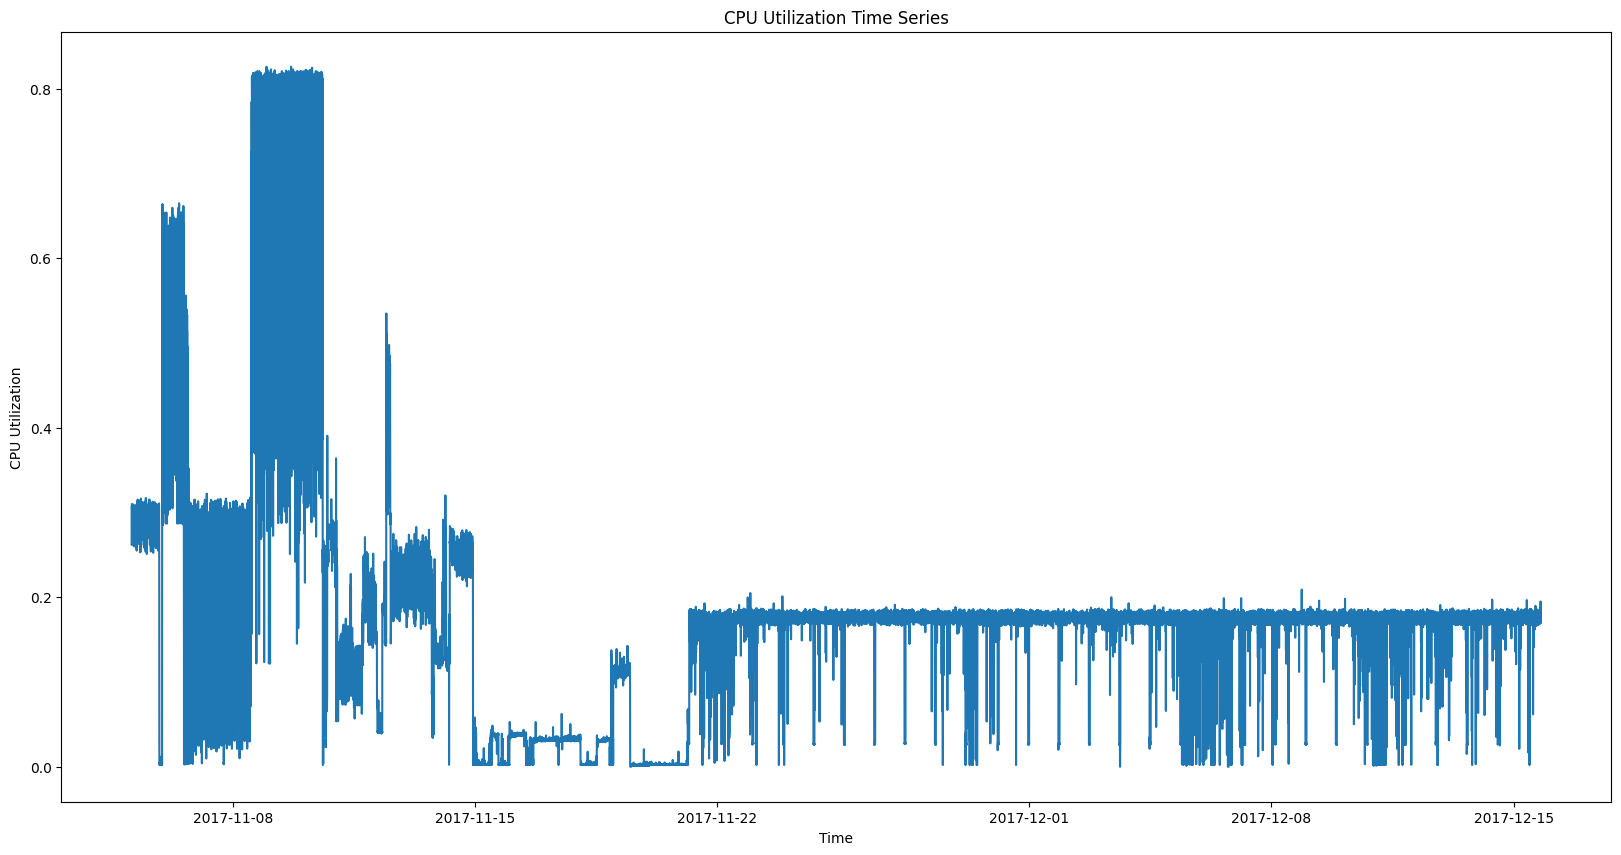

In [34]:
#plot data
plt.figure(figsize=(20,10))
plt.plot(cpu_df['time'], cpu_df['cpu_util'])
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Time Series')
plt.show()

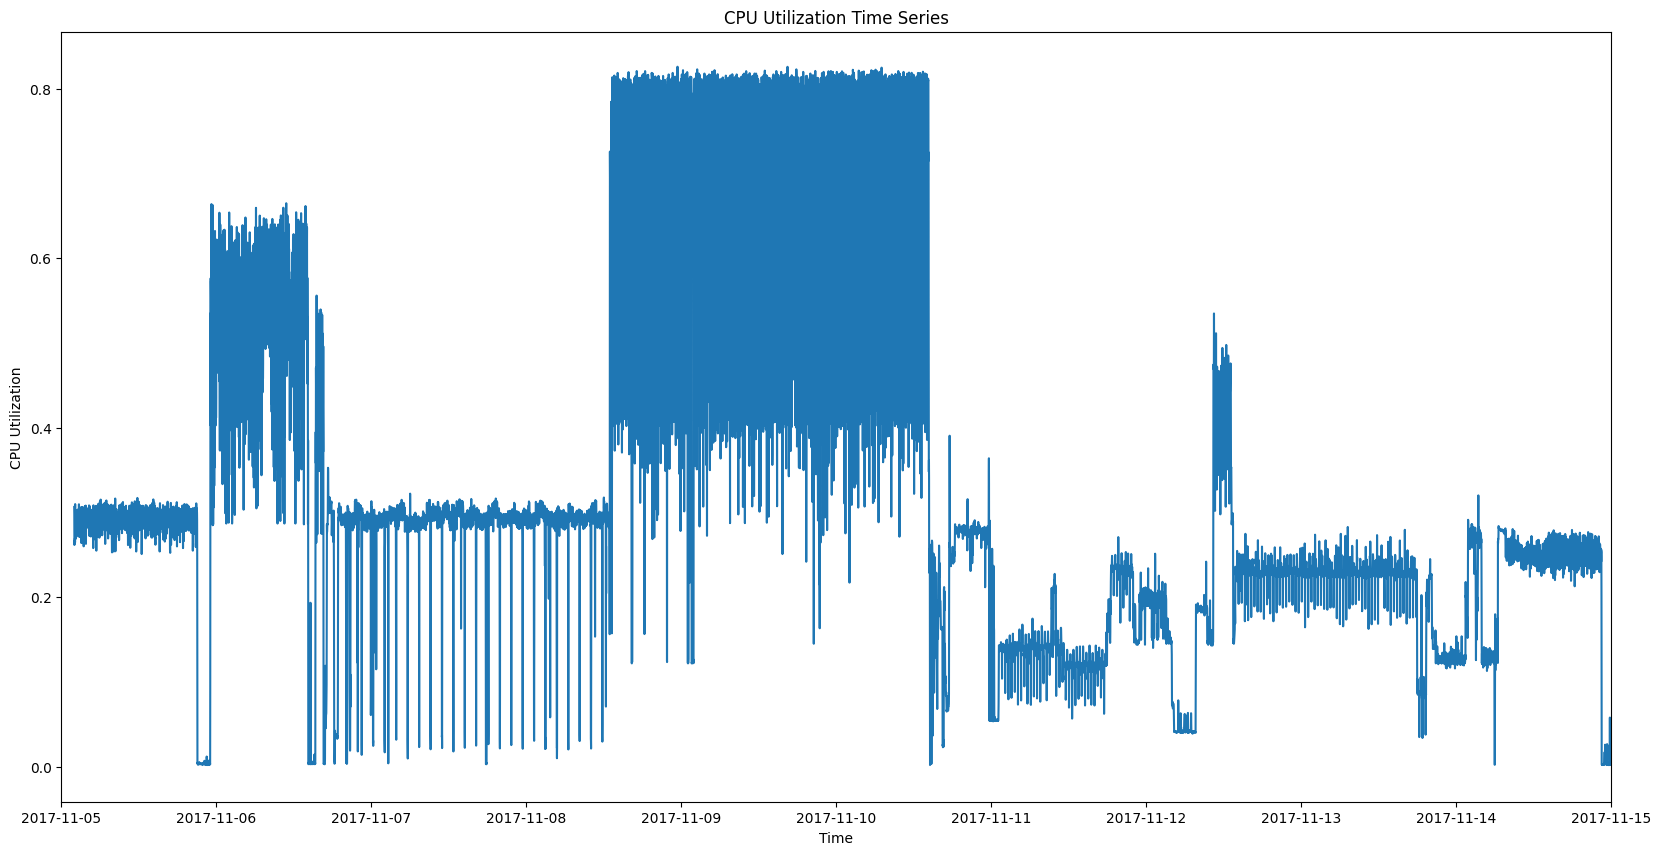

In [35]:
#plot data before 2017-11-15
plt.figure(figsize=(20,10))
plt.plot(cpu_df['time'], cpu_df['cpu_util'])
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Time Series')
plt.xlim(pd.Timestamp('2017-11-05'), pd.Timestamp('2017-11-15'))
plt.show()


In [36]:
#skip/jump data every 5 minutes without mean
cpu_df = cpu_df.set_index('time')
cpu_df = cpu_df.resample('5T').mean()
cpu_df = cpu_df.reset_index()
cpu_df

C:\Users\HP\AppData\Local\Temp\ipykernel_15820\1015321291.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cpu_df = cpu_df.resample('5T').mean()


,time,cpu_util
0,2017-11-05 02:00:00+00:00,0.279063
1,2017-11-05 02:05:00+00:00,0.274687
2,2017-11-05 02:10:00+00:00,0.293007
3,2017-11-05 02:15:00+00:00,0.290867
4,2017-11-05 02:20:00+00:00,0.288103
...,...,...
11716,2017-12-15 18:20:00+00:00,0.178717
11717,2017-12-15 18:25:00+00:00,0.174243
11718,2017-12-15 18:30:00+00:00,0.182830
11719,2017-12-15 18:35:00+00:00,0.175027


In [37]:
cpu_df

,time,cpu_util
0,2017-11-05 02:00:00+00:00,0.279063
1,2017-11-05 02:05:00+00:00,0.274687
2,2017-11-05 02:10:00+00:00,0.293007
3,2017-11-05 02:15:00+00:00,0.290867
4,2017-11-05 02:20:00+00:00,0.288103
...,...,...
11716,2017-12-15 18:20:00+00:00,0.178717
11717,2017-12-15 18:25:00+00:00,0.174243
11718,2017-12-15 18:30:00+00:00,0.182830
11719,2017-12-15 18:35:00+00:00,0.175027


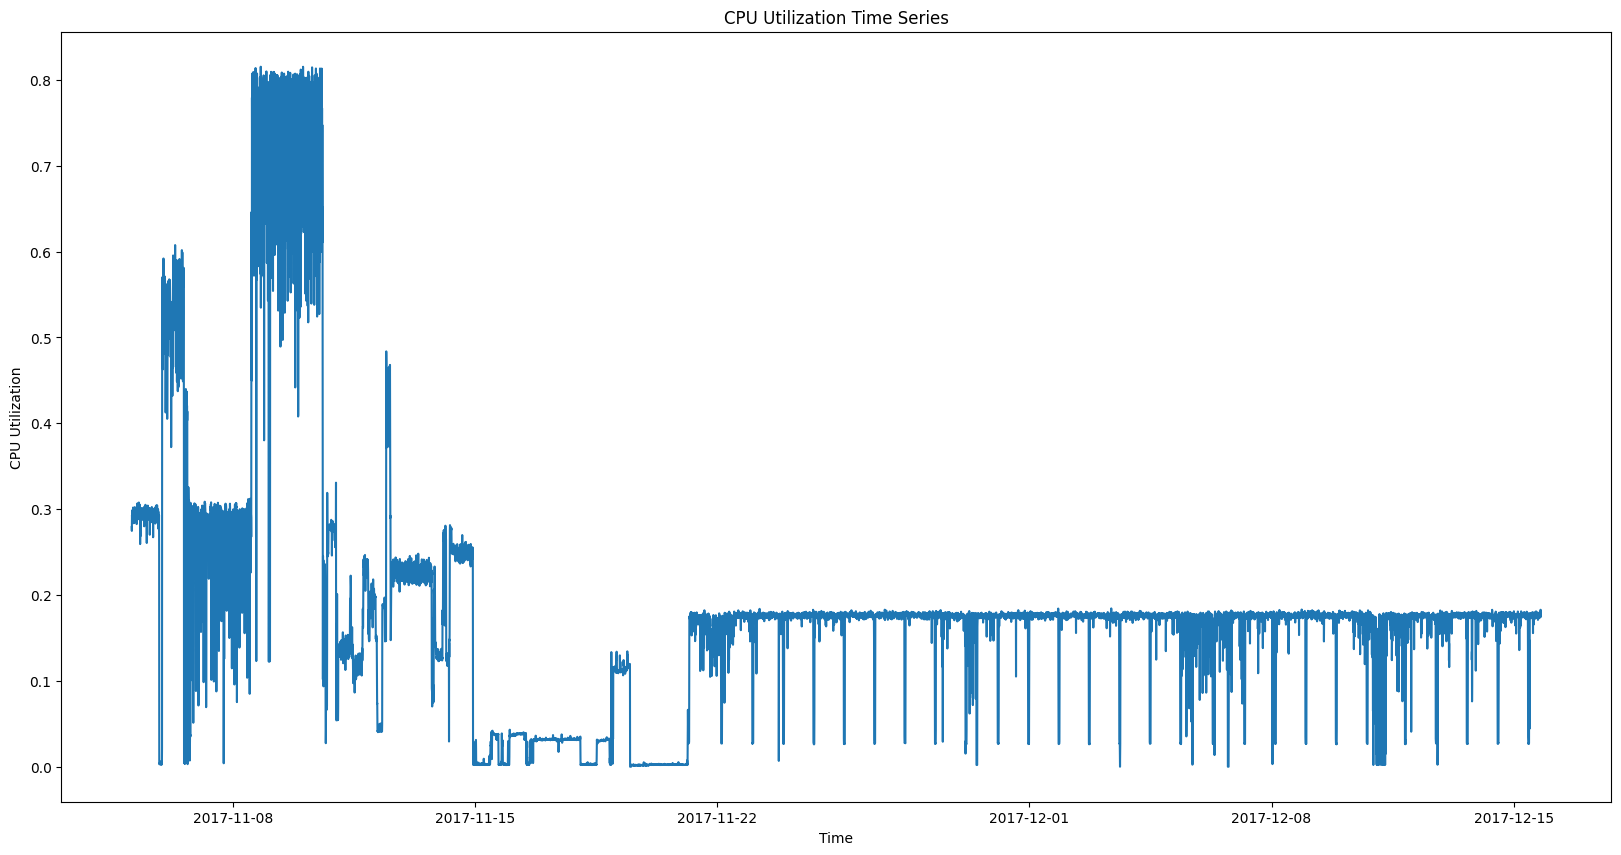

In [38]:
plt.figure(figsize=(20,10))
plt.plot(cpu_df['time'], cpu_df['cpu_util'])
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Time Series')
plt.show()

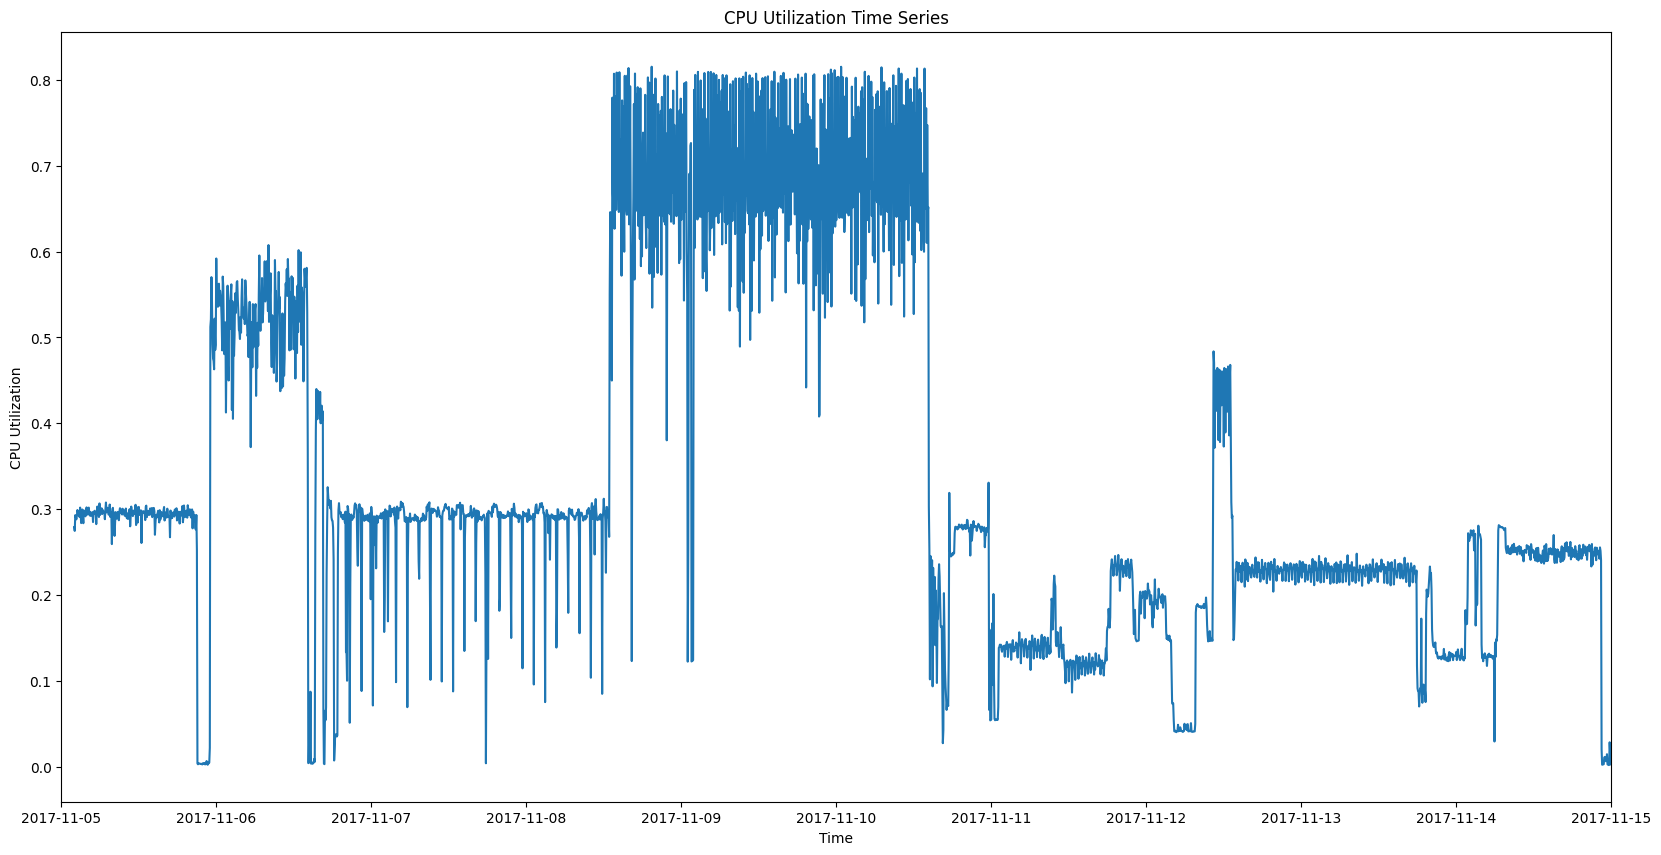

In [14]:
#plot before 2017-11-15
plt.figure(figsize=(20,10))
plt.plot(cpu_df['time'], cpu_df['cpu_util'])
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Time Series')
plt.xlim(pd.Timestamp('2017-11-05'), pd.Timestamp('2017-11-15'))
plt.show()

In [15]:
#show min and max value
print('Min:', cpu_df['cpu_util'].min())
print('Max:', cpu_df['cpu_util'].max())



Min: 0.0
Max: 0.81533


In [16]:
cpu_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cpu_util,11721.0,0.187249,0.145559,0.0,0.15512,0.175747,0.17869,0.81533


In [17]:
#save the cpu_df as csv
cpu_df.to_csv('data/m16_cpu_usage_clean.csv', index=False)